<a href="https://colab.research.google.com/github/G100A008/Python/blob/master/G100A008_Construct%20a%20Linear%20Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
import pandas
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston

def simple_linear_regress(raw_x,raw_y):
  n = np.size(raw_x)
  x = np.array(raw_x)
  y = np.array(raw_y)
  x_mean = np.mean(x)
  y_mean = np.mean(y)

  num1 = np.sum(y*x) - n*y_mean*x_mean
  num2 = np.sum(x*x) - n*x_mean*x_mean
  b_1 = num1 / num2
  b_0 = y_mean - b_1 * x_mean
  return (b_0,b_1)

  rawData = load_boston()
  bostonDataset = pandas.DataFrame(rawData.data,columns=rawData.feature_names)
  bostonDataset['MEDV'] = rawData.target

  x = np.array(bostonDataset['LSTAT'])[:,np.newaxis]
  y = np.array(bostonDataset['MEDV'])[:,np.newaxis]

  b0,b1 = simple_linear_regress(x,y)
  bf1_x = x
  bf1_y = b0 + b1 *bf1_x

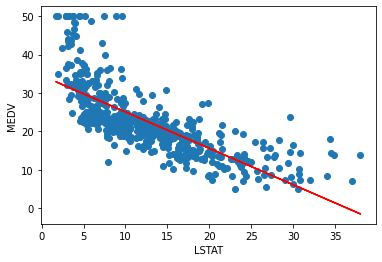

The intercept of the best fitting line is 34.553840879383145
The slope of the best fitting line is -0.950049353757994


In [22]:
  plt.scatter(x,y)
  plt.plot(bf1_x,bf1_y,color = "r")

  plt.xlabel('LSTAT')
  plt.ylabel('MEDV')

  plt.show()
  print('The intercept of the best fitting line is',b0)
  print('The slope of the best fitting line is',b1)